<a href="https://colab.research.google.com/github/viliuma/Python/blob/main/Netflix_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> Features:</h1>

<ul>
  <li> <b>title:</b> The name of the movie or show, an essential identifier.</li>
  <li> <b>type:</b> Distinguishes between a movie and a show, indicating the format of the content</li>
  <li> <b>release_year:</b> The year the content was released, providing a temporal context.</li>
  <li> <b>age_certification:</b> Indicates the age suitability rating, important for audience targeting.</li>
  <li> <b>runtime:</b> Duration of the movie or show in minutes, reflecting content length(value displayed as AVG)</li>  
  <li> <b>genres:</b> Categories of the content, such as comedy, drama, or horror, crucial for understanding its theme.</li>
  <li> <b>production_countries:</b> The countries where the content was produced, highlighting geographical influences.</li>
  <li> <b>seasons:</b> Number of seasons (applicable for shows), indicating the extent of the content.</li>
  <li> <b>imdb_id:</b> A unique identifier for each title on IMDb, useful for cross-referencing.</li>
  <li> <b>imdb_score:</b> The IMDb rating of the content, reflecting its popularity and quality.</li>
  <li> <b>imdb_votes:</b> The number of votes the content received on IMDb, indicative of viewer engagement and popularity.</li>
</ul>


Link to a dataset :<a href="https://www.kaggle.com/datasets/maso0dahmed/netflix-movies-and-shows" title="Netflix Movies and Shows
"> Netflix Movies and Shows
</a>


Goal of Analysis is help a person to decide whether to subsribe to Netflix or not

### Importing libraries

In [86]:
from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/Csv/imdb_movies_shows.csv'
df = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Getting familiar with a data set

In [87]:
df

,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes
0,Five Came Back: The Reference Films,SHOW,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN
1,Taxi Driver,MOVIE,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0
2,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0
3,Life of Brian,MOVIE,1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0
4,The Exorcist,MOVIE,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0
...,...,...,...,...,...,...,...,...,...,...,...
5801,Fine Wine,MOVIE,2021,NaN,100,"['romance', 'drama']",['NG'],NaN,tt13857480,6.9,39.0
5802,Edis Starlight,MOVIE,2021,NaN,74,"['music', 'documentation']",[],NaN,NaN,NaN,NaN
5803,Clash,MOVIE,2021,NaN,88,"['family', 'drama']","['NG', 'CA']",NaN,tt14620732,6.5,32.0
5804,Shadow Parties,MOVIE,2021,NaN,116,"['action', 'thriller']",[],NaN,tt10168094,6.2,9.0


#### looking at data types

In [88]:
df.dtypes

title                    object
type                     object
release_year              int64
age_certification        object
runtime                   int64
genres                   object
production_countries     object
seasons                 float64
imdb_id                  object
imdb_score              float64
imdb_votes              float64
dtype: object

#### Capitalizing Columns for unified format

In [89]:
#Cpitalising Column Names
df.columns = [col.capitalize() for col in df.columns]
df

,Title,Type,Release_year,Age_certification,Runtime,Genres,Production_countries,Seasons,Imdb_id,Imdb_score,Imdb_votes
0,Five Came Back: The Reference Films,SHOW,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN
1,Taxi Driver,MOVIE,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0
2,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0
3,Life of Brian,MOVIE,1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0
4,The Exorcist,MOVIE,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0
...,...,...,...,...,...,...,...,...,...,...,...
5801,Fine Wine,MOVIE,2021,NaN,100,"['romance', 'drama']",['NG'],NaN,tt13857480,6.9,39.0
5802,Edis Starlight,MOVIE,2021,NaN,74,"['music', 'documentation']",[],NaN,NaN,NaN,NaN
5803,Clash,MOVIE,2021,NaN,88,"['family', 'drama']","['NG', 'CA']",NaN,tt14620732,6.5,32.0
5804,Shadow Parties,MOVIE,2021,NaN,116,"['action', 'thriller']",[],NaN,tt10168094,6.2,9.0


#### Validating column names

In [90]:
df.columns

Index(['Title', 'Type', 'Release_year', 'Age_certification', 'Runtime',
       'Genres', 'Production_countries', 'Seasons', 'Imdb_id', 'Imdb_score',
       'Imdb_votes'],
      dtype='object')

#### Dropping or Subsetting Columns

In [91]:

#can you a .dropna() to drop columns
#df = df.dropna(subset=['column_name'])

#subsetting
df = df[['Title', 'Type', 'Release_year',
         'Age_certification',
         'Runtime',
         'Genres',
         'Production_countries',
         'Seasons',
         #'Imdb_id',
         'Imdb_score',
       #'Imdb_votes'

        ]].copy()


#### Renaming columns and Series values

In [92]:
#Renaming a column
df.rename(columns={'Runtime': 'Runtime_minutes'}, inplace = True)

#Renaming Series items
df['Genres'] = df['Genres'].str.replace('documentation', 'documentary')


#Cleaning up soome columns for better visuals
def clean_columns(df,column_names):
    for column_name in column_names:
        df[column_name] = df[column_name].str.replace('[', '').str.replace(']', '').str.replace("'", "")
    return df

df = clean_columns(df, ['Genres', 'Production_countries'])



<ipython-input-92-4b477117b031>:11: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[column_name] = df[column_name].str.replace('[', '').str.replace(']', '').str.replace("'", "")


#### Change Release year to a Datetime

In [93]:

#while technically numeric value is ok for only year but good practise to keep data types as they should be
df['Realease_year']= pd.to_datetime(df['Release_year'],format='%Y')

df.dtypes

Title                           object
Type                            object
Release_year                     int64
Age_certification               object
Runtime_minutes                  int64
Genres                          object
Production_countries            object
Seasons                        float64
Imdb_score                     float64
Realease_year           datetime64[ns]
dtype: object

#### Filtering dataframe

In [94]:


df = df[(df['Runtime_minutes'] > 1) & (df['Imdb_score']> 0)]
#reseting index
df = df.reset_index(drop=True)
#df.dtypes
df

,Title,Type,Release_year,Age_certification,Runtime_minutes,Genres,Production_countries,Seasons,Imdb_score,Realease_year
0,Taxi Driver,MOVIE,1976,R,113,"crime, drama",US,NaN,8.3,1976-01-01
1,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"comedy, fantasy",GB,NaN,8.2,1975-01-01
2,Life of Brian,MOVIE,1979,R,94,comedy,GB,NaN,8.0,1979-01-01
3,The Exorcist,MOVIE,1973,R,133,horror,US,NaN,8.1,1973-01-01
4,Monty Python's Flying Circus,SHOW,1969,TV-14,30,"comedy, european",GB,4.0,8.8,1969-01-01
...,...,...,...,...,...,...,...,...,...,...
5260,Time to Dance,MOVIE,2021,NaN,107,"drama, romance",IN,NaN,2.2,2021-01-01
5261,Momshies! Your Soul is Mine,MOVIE,2021,NaN,108,comedy,PH,NaN,5.8,2021-01-01
5262,Fine Wine,MOVIE,2021,NaN,100,"romance, drama",NG,NaN,6.9,2021-01-01
5263,Clash,MOVIE,2021,NaN,88,"family, drama","NG, CA",NaN,6.5,2021-01-01


#### looking at missing Values

In [95]:
#looking at missing values
df.isna().sum()

#Seasons column has 3407 na columns which makes sense since a column is contains amount of seasons, but movies dont have seasons

Title                      0
Type                       0
Release_year               0
Age_certification       2280
Runtime_minutes            0
Genres                     0
Production_countries       0
Seasons                 3407
Imdb_score                 0
Realease_year              0
dtype: int64

#### Validating that 'Type' column NaN values are = to Shows

In [96]:
#validating prior statement
df['Type'].value_counts()

MOVIE    3407
SHOW     1858
Name: Type, dtype: int64

### Creating Resuable Function to call for visualisation

In [97]:
#creating function on single column bar charts to reuse with some options like orientation title and ax for subplots
def plot_single_column_bar_chart(data, orientation='vertical', ax=None, title=None):

    #creating a condition if based on barchart orientation (Vertical)
    if orientation == 'vertical':
        #since im pulling values from a single column
        sns.barplot(x=data.index, y=data.values,
                    orient=orientation,
                    ax=ax,
                    palette='dark:#5A9_r')

        #Removing borders from top and left since going to display values counts inside the chart
        sns.despine(top=True,left=True)
        #Removing y axis counts
        ax.set_yticks([])
        #using .text() to basically create a name which in this case is value count for every column
        for index, value in enumerate(data.values):
            ax.text(index, value, str(value), ha='center', va='bottom', fontsize=10)

    #creating a condition if based on barchart orientation (Horizontal)
    elif orientation == 'horizontal':
        sns.barplot(x=data.values, y=data.index,
                    orient=orientation,
                    ax=ax,
                    palette='dark:#5A9_r')
        sns.despine(top=True,bottom=True)
        ax.set_xticks([])
        for index, value in enumerate(data.values):
            ax.text(value, index, str(value), ha='left', va='center', fontsize=10)
    else:
        #could used a simple print() but for drawing attention raise ValueError is very good since it is displayed as error
        raise ValueError("Invalid orientation. Use 'vertical' or 'horizontal'.")

    ax.set_title(title)
    ax.set_xlabel('')
    ax.set_ylabel('')

### Visualisation

#### Content Split

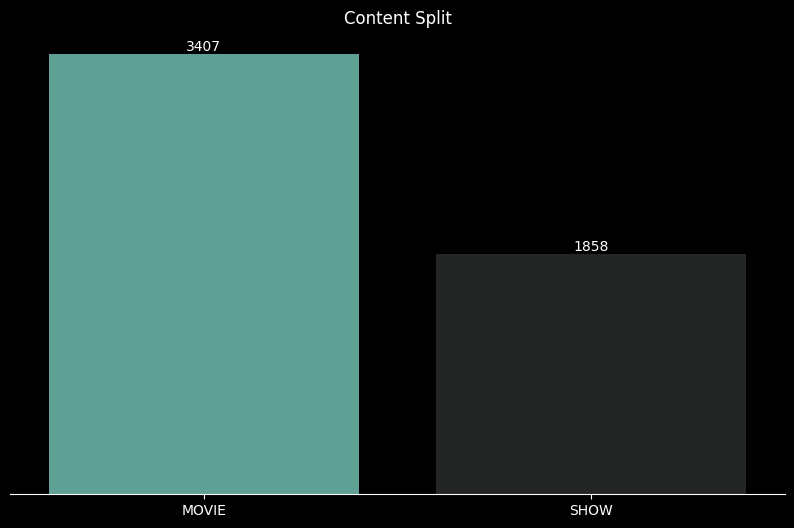

In [111]:
# Counting how many movies and show there is
# .value_counts() will count unique values for an item in the column

number_of_shows_movies = df['Type'].value_counts()
orientation ='vertical'

# Create a subplot with 1 row and 1 column
style.use('dark_background')


fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# calling a function to see how to see content split
plot_single_column_bar_chart(number_of_shows_movies, orientation, ax, 'Content Split')


# Show the plot
plt.show()


#### Movie and Tv Shows distribution

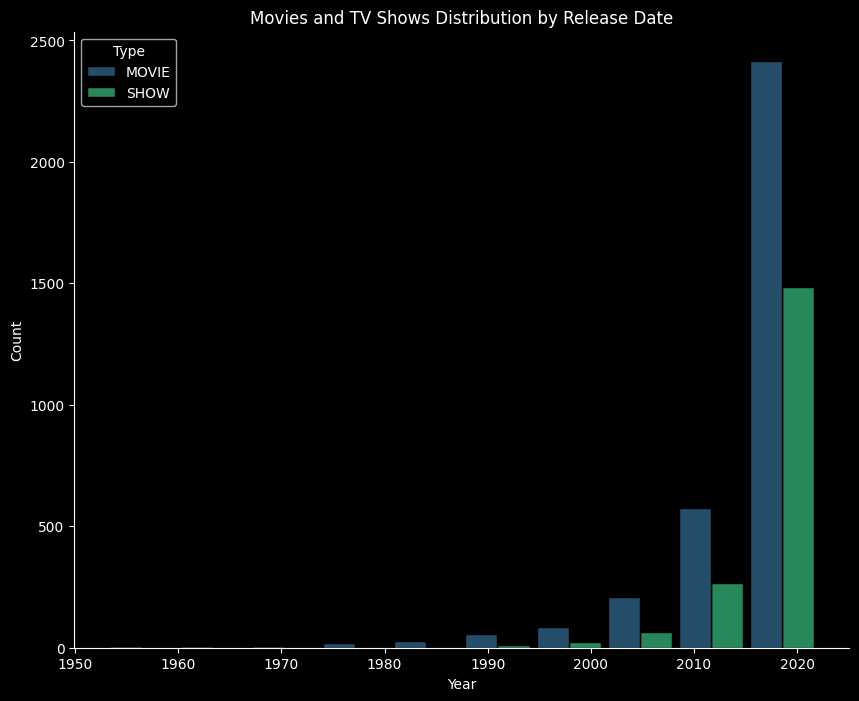

In [112]:
#sns.histplot(data=df, x="Release_year", kde=True, hue="Type", multiple="dodge")

plt.figure(figsize=(10, 8))

#histplot is good way to display a distribution of data
sns.histplot(data=df, x=df['Release_year'],
             bins=10,
             #kde=True,
             hue="Type",
             multiple="dodge",
             edgecolor='black',
             palette='viridis',
             shrink=.9)

style.use('dark_background')
sns.despine()
plt.title("Movies and TV Shows Distribution by Release Date", color='white')
plt.xlabel('Year', c ='white')
plt.ylabel('Count', c ='white')
plt.xticks(c='white')
plt.yticks(c='white')
plt.show()

#### Catalog Brakedown By Genre

In [ ]:
genres_array = np.array(df['Genres'])

# since array consists of basically multiple strings like ['comedy','drama,comedy',...]/
#after that array will consist of single words
genres_string = ','.join(genres_array)

# cleaning up whitespace using list comprehension
all_genres = [genre.strip() for genre in genres_string.split(',')]

# Step 3: Count the occurrences of each genre using a dictionary
genre_counts = {}
for genre in all_genres:
    if genre:
        genre_counts[genre] = genre_counts.get(genre, 0) + 1

#genre_counts #looking at dictionary pairs


# Convert genre_counts to a NumPy array (might be redundant)
genre_counts_array = np.array(list(genre_counts.items()))

#genre_counts_array #looking at array

# Creating seperate dataframe
genre_counts_df = pd.DataFrame(genre_counts_array, columns=['Genre', 'Count'])

# Sorting the df by count in descending order for better visualization
genre_counts_df['Count'] = genre_counts_df['Count'].astype(int)  # Convert count to integer
genre_counts_df = genre_counts_df.sort_values(by='Count', ascending=False)

#genre_counts_df #lookig at slice of dataframe


# Plot the bar chart using Seaborn
style.use('dark_background')
plt.figure(figsize=(10, 8))
ax = sns.barplot(x='Count', y='Genre', data=genre_counts_df,
                 palette='dark:#5A9_r')

for index, value in enumerate(genre_counts_df['Count']):
    ax.text(value, index, str(value), ha='left', va='center', fontsize=10)


plt.xlabel('')
plt.ylabel('')
plt.title('Genre')
ax.set_xticks([])
sns.despine(top=True,bottom=True)
plt.show()


#### Movie and Tv Shows Genres

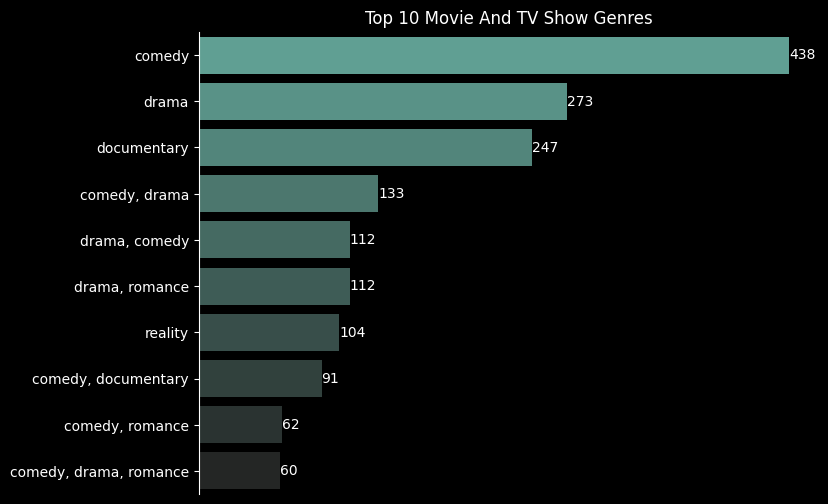

In [101]:
top_ten_genres = df['Genres'].value_counts().head(10)
orientation = 'horizontal'

# Create a subplot with 1 row and 1 column
style.use('dark_background')
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

# Call the function with the correct arguments
plot_single_column_bar_chart(top_ten_genres, orientation, ax, 'Top 10 Movie And TV Show Genres')

# Show the plot
plt.show()

#### Content Genre by Type

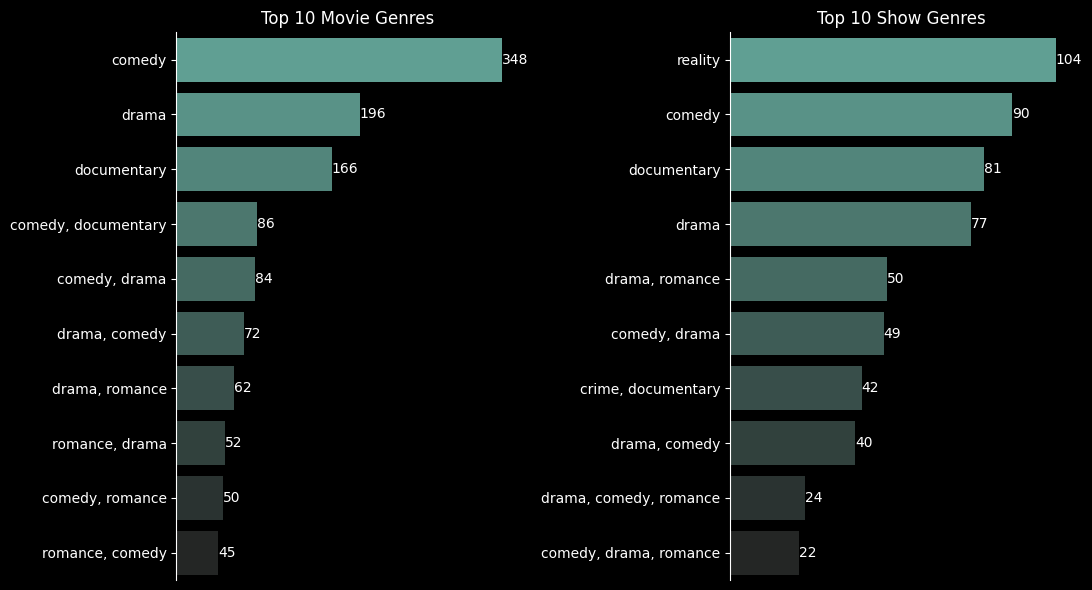

In [102]:
# Filter movies
movie_df = df[df['Type'].str.lower() == 'movie']
top_ten_movie_genres = movie_df['Genres'].value_counts().head(10)

# Filter shows
show_df = df[df['Type'].str.lower() == 'show']
top_ten_show_genres = show_df['Genres'].value_counts().head(10)

# Create subplots
style.use('dark_background')
fig, ax = plt.subplots(1, 2, figsize=(11, 6))

# Plot movies with vertical orientation
orientation = 'horizontal'
plot_single_column_bar_chart(top_ten_movie_genres, orientation, ax[0], 'Top 10 Movie Genres')

# Plot shows with horizontal orientation
orientation = 'horizontal'
plot_single_column_bar_chart(top_ten_show_genres, orientation, ax[1], 'Top 10 Show Genres')

#.tight_layout() to avoid overlapping of plots
plt.tight_layout()
plt.show()

#### Tv Shows and Movies Maturity Rating

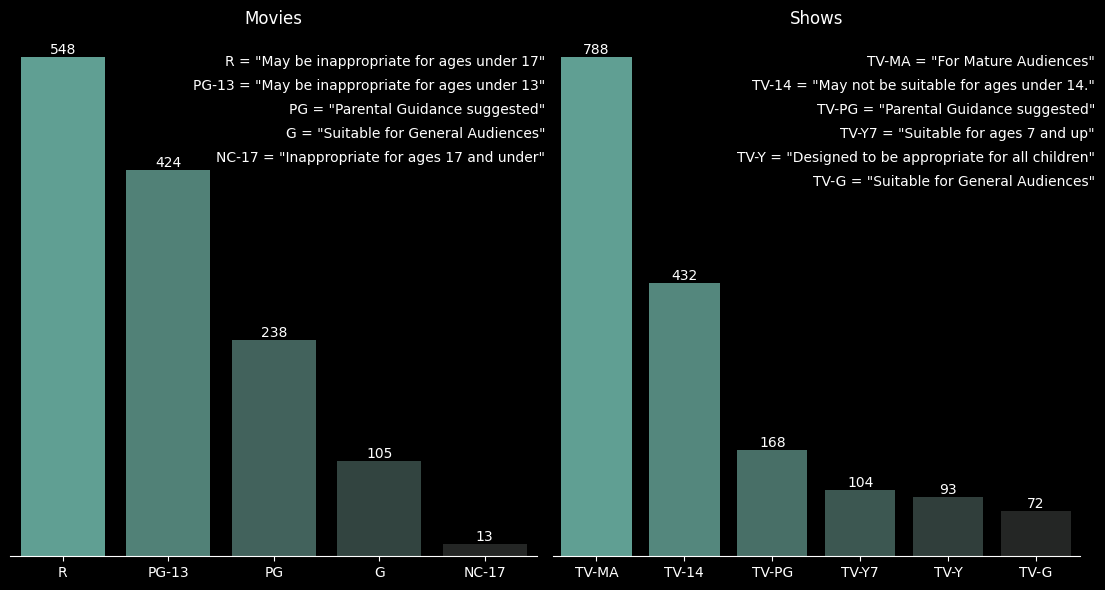

In [121]:
age_certification_movie_df = movie_df['Age_certification'].value_counts()
age_certification_movie_df_values = age_certification_movie_df.index


age_certification_show_df = show_df['Age_certification'].value_counts()
age_certification_show_df_values = age_certification_show_df.index

rating_explanation = {'R': 'May be inappropriate for ages under 17',
                    'PG-13': 'May be inappropriate for ages under 13',
                    'PG': 'Parental Guidance suggested',
                    'G': 'Suitable for General Audiences',
                    'NC-17':'Inappropriate for ages 17 and under',
                    'TV-MA': 'For Mature Audiences',
                    'TV-14': 'May not be suitable for ages under 14.',
                    'TV-PG': 'Parental Guidance suggested',
                    'TV-Y7': 'Suitable for ages 7 and up',
                    'TV-Y': 'Designed to be appropriate for all children',
                    'TV-G': 'Suitable for General Audiences'}



# Create a subplot with 1 row and 2 columns
fig, ax = plt.subplots(1, 2, figsize=(11, 6))
# Create bar chart for movies
orientation = 'vertical'
plot_single_column_bar_chart(age_certification_movie_df,
                             orientation,
                             ax[0],
                             'Movies')

#creating and position rating explanation
for i, value in enumerate(age_certification_movie_df_values):
    explanation = f'{value} = "{rating_explanation.get(value)}"'
    fig.text(0.5, 0.9 - i * 0.04, explanation, ha='right', va='top', fontsize=10)


# Create bar chart for shows
orientation = 'vertical'
plot_single_column_bar_chart(age_certification_show_df,
                             orientation,
                             ax[1],
                             'Shows')

for i, value in enumerate(age_certification_show_df_values):
    explanation = f'{value} = "{rating_explanation.get(value)}"'
    fig.text(1, 0.9 - i * 0.04, explanation, ha='right', va='top', fontsize=10)
#.tight_layout() to avoid overlapping of plots
plt.tight_layout()
plt.show()


#### Movie and Tv show durations


In [104]:
#movie_df = df[df['Type'].str.lower() == 'movie']
#show_df = df[df['Type'].str.lower() == 'show']

avg_movie_duration = movie_df['Runtime_minutes'].agg(['mean','min','max'])
avg_show_duration = show_df['Runtime_minutes'].agg(['mean','min','max'])
avg_show_duration

mean     39.006997
min       2.000000
max     178.000000
Name: Runtime_minutes, dtype: float64

In [105]:
avg_movie_duration


mean    101.537423
min       8.000000
max     235.000000
Name: Runtime_minutes, dtype: float64

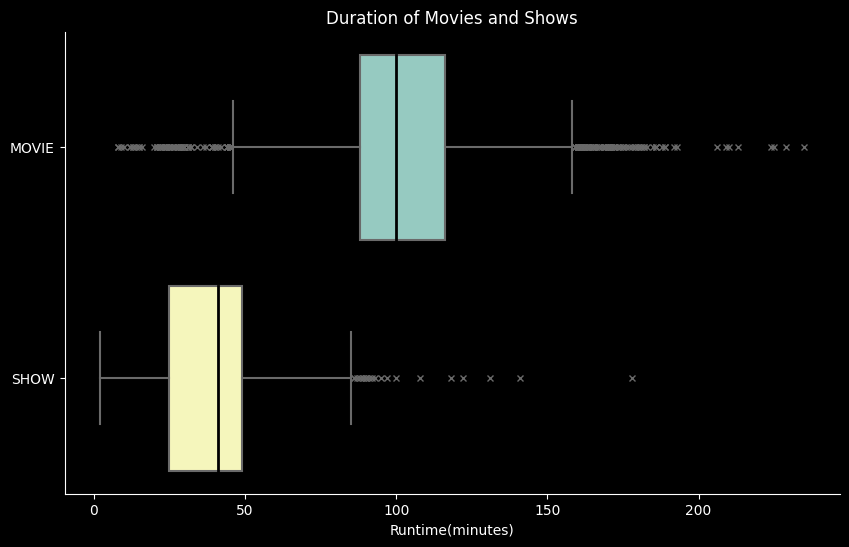

In [106]:
plt.figure(figsize=(10, 6))

sns.boxplot(x=df['Runtime_minutes'], y= df['Type'], data=df,
            medianprops={"color": "black", "linewidth": 2},
            flierprops={"marker": "x"},
            )

sns.despine()
plt.title('Duration of Movies and Shows')
plt.ylabel('')
plt.xlabel('Runtime(minutes)')
plt.show()


#### Tv Shows and Movies Quality Distribution

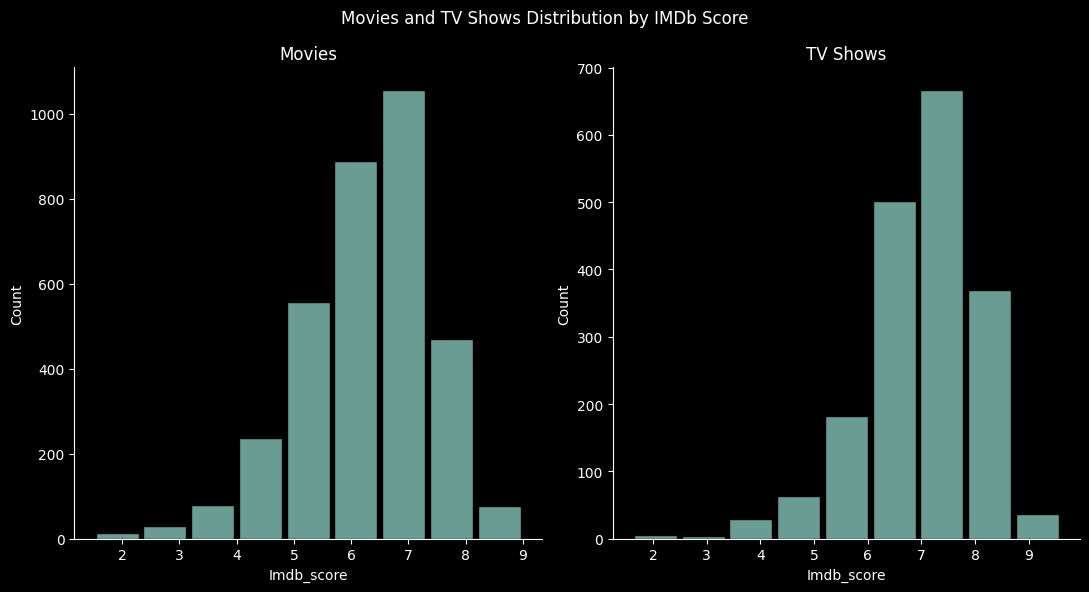

In [118]:
movie_scores_df = movie_df['Imdb_score'].abs().value_counts()
movie_scores_df_values = movie_scores_df.index

show_scores_df = show_df['Imdb_score'].abs().value_counts()
show_scores_df_values = show_scores_df.index




fig, ax = plt.subplots(1, 2, figsize=(11, 6))

# Plot for movies
sns.histplot(
             data=movie_df, x='Imdb_score',
             bins=9,
             #kde=True,
             ax=ax[0],
             edgecolor='black',
             shrink=.9
             )
ax[0].set_title("Movies")

# Plot for TV shows
sns.histplot(
             data=show_df, x='Imdb_score',
             bins=9,
             #kde=True,
             ax=ax[1],
             edgecolor='black',
             shrink=.9
             )
ax[1].set_title("TV Shows")

# Customize the overall plot
style.use('dark_background')
sns.despine()
plt.suptitle("Movies and TV Shows Distribution by IMDb Score", color='white')
plt.tight_layout()
plt.show()